In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
sales = pd.read_csv('data/Video_Games_Sales_as_at_22_Dec_2016.csv', encoding_errors='ignore')
sales.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
12604,Culdcept Revolt,3DS,2016.0,Strategy,Nintendo,0.00,0.00,0.06,0.00,0.06,NaN,NaN,NaN,NaN,NaN,NaN
10284,Vacation Sports,Wii,2009.0,Sports,Ubisoft,0.09,0.01,0.00,0.01,0.11,NaN,NaN,NaN,NaN,Mere Mortals,E
13865,99 no Namida,DS,2008.0,Adventure,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
3387,Medal of Honor: Frontline,GC,2002.0,Shooter,Electronic Arts,0.46,0.12,0.00,0.02,0.59,80.0,16.0,7.9,16.0,Dreamworks Games,T
9672,Worms 3D,PS2,2003.0,Strategy,Sega,0.06,0.05,0.00,0.02,0.12,70.0,31.0,7.8,22.0,Team 17,T


In [3]:
groupped = []
decade = []
for i in sales.Platform:
    if i.startswith('X'):
        groupped.append('X Box')
    elif i.startswith(('PS', 'Play', 'PlayStation')):
        groupped.append('PS')
    elif i.startswith('PC'):
        groupped.append('PC')
    elif i.startswith(('SNES', 'WII', 'Wii', 'Nintendo', 'NES', 'Game Boy')):
        groupped.append('Nintendo')    
    else:
        groupped.append('Other')

for i in sales.Year_of_Release:
    if np.isnan(i):
        decade.append(np.nan)
    else:
        decade.append(str(i)[2] + '0s')

sales['groupped_platform'] = groupped
sales['decade'] = decade
sales.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,groupped_platform,decade
8842,Top Gun: Combat Zones,GC,2002.0,Simulation,Titus,0.12,0.03,0.0,0.00,0.15,59.0,10.0,7.1,7.0,Titus Software,E,Other,00s
4236,Scooby-Doo,GBA,2001.0,Platform,THQ,0.33,0.12,0.0,0.01,0.46,64.0,5.0,NaN,NaN,Helixe,E,Other,00s
7159,LEGO The Hobbit,WiiU,2014.0,Action,Warner Bros. Interactive Entertainment,0.09,0.11,0.0,0.02,0.22,NaN,NaN,7.8,11.0,TT Games,E10+,Nintendo,10s
540,The Sims,PS2,2003.0,Simulation,Electronic Arts,1.41,1.12,0.0,0.24,2.77,83.0,33.0,7.7,46.0,Edge of Reality,T,PS,00s
13237,Fishdom,DS,2011.0,Puzzle,Atari,0.05,0.00,0.0,0.00,0.05,NaN,NaN,NaN,NaN,Playrix Entertainment,E,Other,10s


In [4]:
sales.info()
sales.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               16717 non-null  object 
 1   Platform           16719 non-null  object 
 2   Year_of_Release    16450 non-null  float64
 3   Genre              16717 non-null  object 
 4   Publisher          16665 non-null  object 
 5   NA_Sales           16719 non-null  float64
 6   EU_Sales           16719 non-null  float64
 7   JP_Sales           16719 non-null  float64
 8   Other_Sales        16719 non-null  float64
 9   Global_Sales       16719 non-null  float64
 10  Critic_Score       8137 non-null   float64
 11  Critic_Count       8137 non-null   float64
 12  User_Score         7590 non-null   float64
 13  User_Count         7590 non-null   float64
 14  Developer          10096 non-null  object 
 15  Rating             9950 non-null   object 
 16  groupped_platform  167

(16719, 18)

# Data has many blank values for Critic Scores, User Scores, Ratings, and much less blanks for Name, Year, Genre, Publisher

<AxesSubplot:>

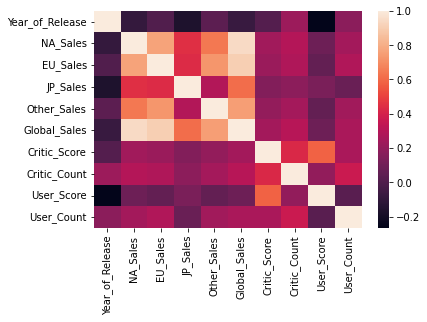

In [5]:
# checking correlation

sns.heatmap(sales.corr())

# It's interesting how User Score is really unique for each release year

In [6]:
sales.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [7]:
for i in ['Genre', 'Rating']:
    print(sales[i].value_counts())

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64
E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64


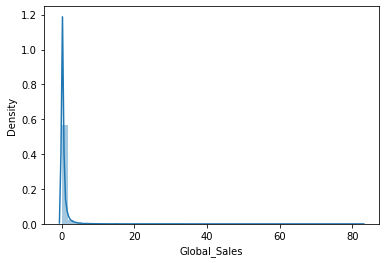

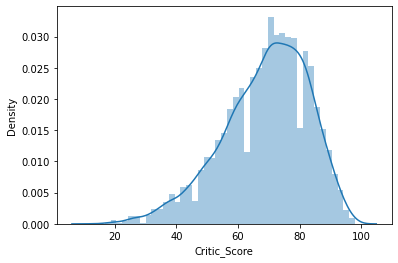

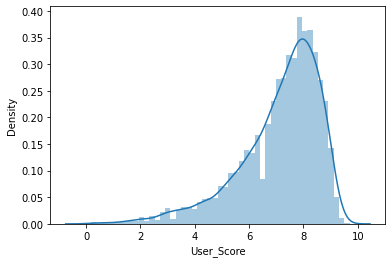

In [8]:
#checking data distributions of numeric columns

for feature in ['Global_Sales', 'Critic_Score', 'User_Score']:
    data = sales.copy()
    ax2 = sns.distplot(data[feature])
    plt.show()

# Distribution of those features are skewed so not Gaussian

Year_of_Release
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     48.40
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    419.05
2005.0    458.31
2006.0    518.22
2007.0    605.37
2008.0    671.79
2009.0    658.88
2010.0    590.59
2011.0    507.79
2012.0    355.84
2013.0    361.24
2014.0    331.51
2015.0    268.05
2016.0    130.10
2017.0      0.06
2020.0      0.29
Name: Global_Sales, dtype: float64


Text(0.5, 1.0, 'Global Sales by Year')

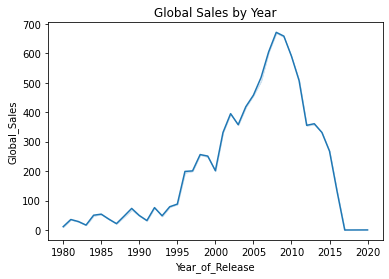

In [9]:
# lets see the sales sdeveloping on timeline
print(sales.groupby('Year_of_Release')['Global_Sales'].sum())
sns.lineplot(x='Year_of_Release', y='Global_Sales',data=sales, ci=False, estimator=np.sum)
plt.title('Global Sales by Year')

Text(0.5, 1.0, 'Average Global Sales by Year')

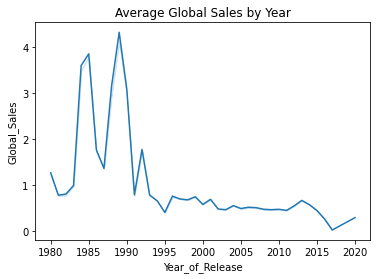

In [10]:
sns.lineplot(x='Year_of_Release', y='Global_Sales',data=sales, ci=False, estimator=np.mean)
plt.title('Average Global Sales by Year')

# Can discover that global sales of videogames lately got a tendency to decrease. Boom of sales for the platforms and games available in the dataset was in 00s, especially in the late 00s.
# Also average bill is decreasing after its peak in late 90s.

[[Text(0, 0, 'North America'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'Other')]]

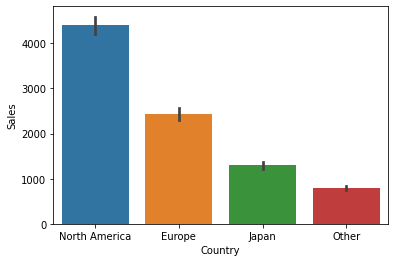

In [11]:
#lets compare how the sales are split by country
country_sales = pd.melt(sales, var_name='Country', value_vars=['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'], value_name='Sales')
g = sns.barplot(x='Country', y='Sales', data=country_sales, estimator=np.sum)
g.set(xticklabels=['North America', 'Europe', 'Japan', 'Other'])



# We can see that America and EU are drastic leaders in video games sales all over the years.

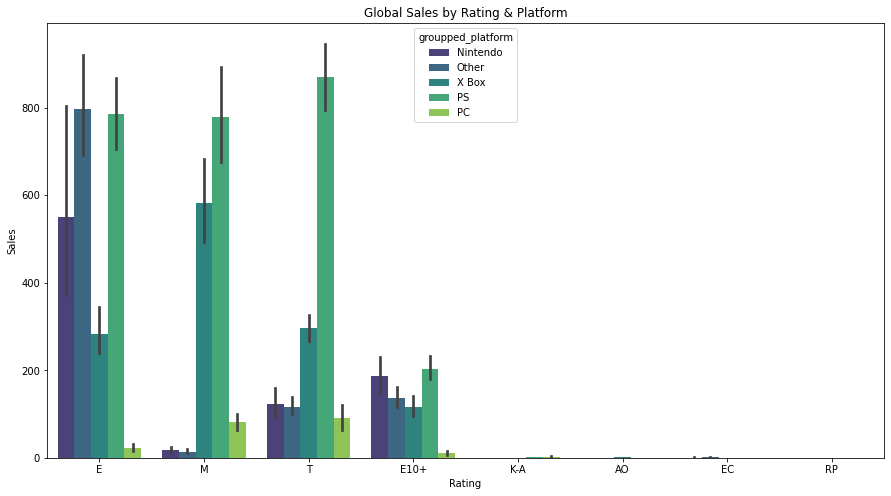

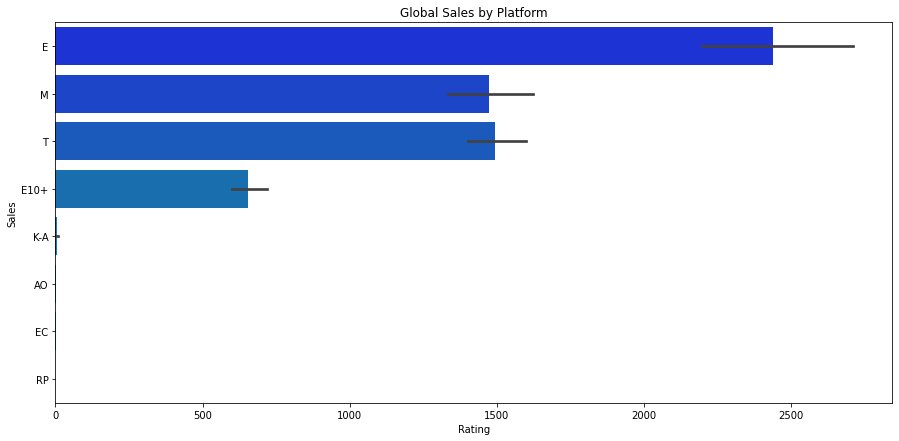

In [12]:
from cProfile import label


plt.figure(figsize=(15,8))
ax = sns.barplot(data=sales, x='Rating', y='Global_Sales', hue='groupped_platform',palette = 'viridis', estimator=np.sum)
plt.title("Global Sales by Rating & Platform")
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.show()

print()

plt.figure(figsize= (15, 7))
sns.barplot(x='Global_Sales', y='Rating', palette= 'winter',data = sales, estimator=np.sum)
plt.title('Global Sales by Platform')
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.show()

# Most selling products are with the ratings E, M, T

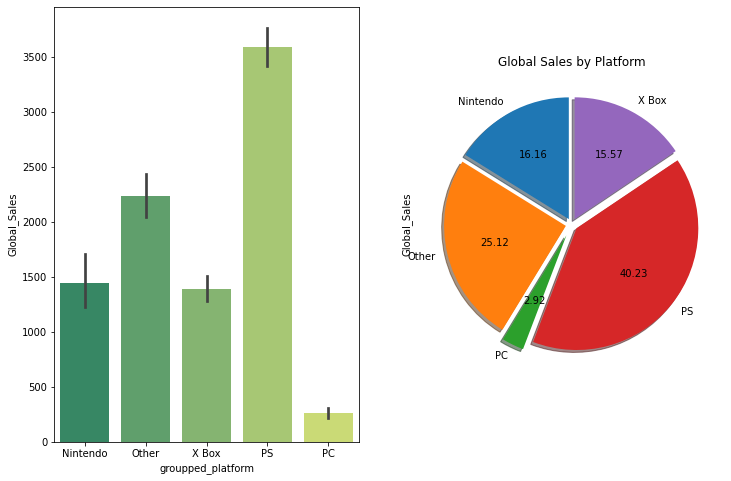

In [13]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))

sns.barplot(x='groupped_platform', y='Global_Sales', palette= 'summer',data = sales, ax=axarr[0], estimator=np.sum)
plt.title('Global Sales by Platform')

sales.groupby('groupped_platform')['Global_Sales'].sum().plot(kind = 'pie',autopct = '%.2f', shadow = True, startangle=90, explode=(0.05,0.05,0.1,0.05,0.05))
plt.show()

# The majority of sold games are published for consoles. PC games are not selling well.

In [14]:
import plotly.express as px
fig = px.histogram(sales,
                x='groupped_platform',
                y='Global_Sales',
                color='Publisher',
                template='plotly_dark',
                title='Total Number of Books sold based on Store per Country')
fig.show()

# The most selling game publisher is Nintendo

<AxesSubplot:xlabel='decade', ylabel='Global_Sales'>

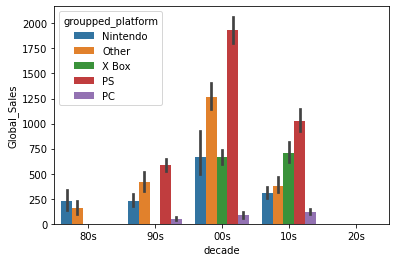

In [15]:
sns.barplot(x='decade', y='Global_Sales', data=sales, hue='groupped_platform', estimator=np.sum, order=['80s', '90s', '00s', '10s', '20s'])

# We can also note that Playstation is the most selling game platform since it has appeared in 90s

<AxesSubplot:xlabel='decade', ylabel='Global_Sales'>

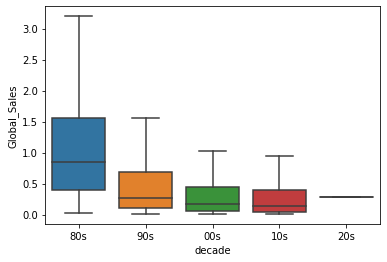

In [16]:
sns.boxplot(x='decade', y='Global_Sales', data=sales, showfliers = False, order=['80s', '90s', '00s', '10s', '20s'])

# Likley the competition forces game producers to allign with the common priceline more and more.

# $\color{green}{\text{Global sales prediction}}$

In [17]:
# preparing raw data
sales.sample(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,groupped_platform,decade
6080,PGA Tour 97,PS,1996.0,Sports,Electronic Arts,0.16,0.11,0.0,0.02,0.29,NaN,NaN,NaN,NaN,NaN,NaN,PS,90s
14053,Without Warning,PS2,2005.0,Shooter,Capcom,0.02,0.01,0.0,0.00,0.04,45.0,25.0,6.5,8.0,CiRCLE,M,PS,00s
14727,Jack Keane,PC,2008.0,Adventure,Kalypso Media,0.00,0.02,0.0,0.00,0.03,69.0,25.0,7.0,21.0,Legacy Interactive,T,PC,00s


In [18]:
#preprocessing features
data = sales[['groupped_platform', 'Year_of_Release', 'Genre', 'Global_Sales']].query("groupped_platform !='Other' & Global_Sales !=0 & Year_of_Release.notnull()")
data = data.rename(columns={'groupped_platform':'platform', 'Year_of_Release':'year', 'Genre':'genre', 'Global_Sales':'sales'})
data['year'] = data['year'].apply(lambda x : int(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11650 entries, 0 to 16718
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   platform  11650 non-null  object 
 1   year      11650 non-null  int64  
 2   genre     11650 non-null  object 
 3   sales     11650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 455.1+ KB


In [19]:
#grouping entries by features
data = pd.DataFrame(data.groupby(['year','platform', 'genre'])['sales'].sum()).reset_index()
data.sample(5)

,year,platform,genre,sales
226,2000,PS,Simulation,3.05
182,1998,PC,Strategy,2.20
755,2014,PC,Racing,0.31
341,2004,X Box,Misc,3.58
246,2001,PS,Sports,40.36


In [20]:

for i in ['platform', 'genre']:
    data[i+'encoded'] = LabelEncoder().fit_transform(data[i])

platform_ref = list(map(list, zip(set(data.platformencoded), set(data.platform))))
genre_ref = list(map(list, zip(set(data.genreencoded), set(data.genre))))

print(platform_ref)
print(genre_ref)
data

[[0, 'PS'], [1, 'X Box'], [2, 'PC'], [3, 'Nintendo']]
[[0, 'Racing'], [1, 'Sports'], [2, 'Adventure'], [3, 'Action'], [4, 'Misc'], [5, 'Role-Playing'], [6, 'Puzzle'], [7, 'Platform'], [8, 'Shooter'], [9, 'Strategy'], [10, 'Simulation'], [11, 'Fighting']]


,year,platform,genre,sales,platformencoded,genreencoded
0,1983,Nintendo,Misc,2.14,0,3
1,1983,Nintendo,Platform,5.62,0,4
2,1983,Nintendo,Sports,3.20,0,10
3,1984,Nintendo,Action,1.85,0,0
4,1984,Nintendo,Misc,1.45,0,3
...,...,...,...,...,...,...
860,2016,X Box,Simulation,0.13,3,9
861,2016,X Box,Sports,7.02,3,10
862,2016,X Box,Strategy,0.05,3,11
863,2017,PS,Action,0.01,2,0


In [21]:
# defining X and y

X = data.drop(['platform','genre', 'sales'], axis=1)
y = data.sales

#building and training a model
model = LinearRegression()
model.fit(X,y)
print(model.coef_)
print(model.feature_names_in_)


[ 0.02945769  1.73884088 -0.20179265]
['year' 'platformencoded' 'genreencoded']


In [22]:
#predicting Global sales for 2025 for Play Station Racing Games

model.predict([[2025, 1, 10]])

array([6.54834627])